# Import required modules

In [1]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

In [2]:
import tissuetypist as tt

/software/cellgen/team205/kk18/envs/tissuetypist_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team205/kk18/envs/tissuetypist_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
sc.settings.verbosity = 1          # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)

# Prepare reference dataframe

The output dataframe will include:
* Gene expression data of each spot (suffix: `_own`)
* Gene expression data of neighbour spots (suffix: `_neighbour-max`)
* Section ID (`section`)
* XY coordinates (`x` and `y`)
* Distance to tissue edge (`distance_to_edge`)
* Tissue label (`tissue`)

You can use full panel for VisiumHD, so no need to input specific gene_panel

log-normalising...
2603 genes will be used


/nfs/team205/kk18/github/TissueTypist/tissuetypist/preprocess.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for section, group_df in data.groupby('section'):


Calculating distance from tissue edge...


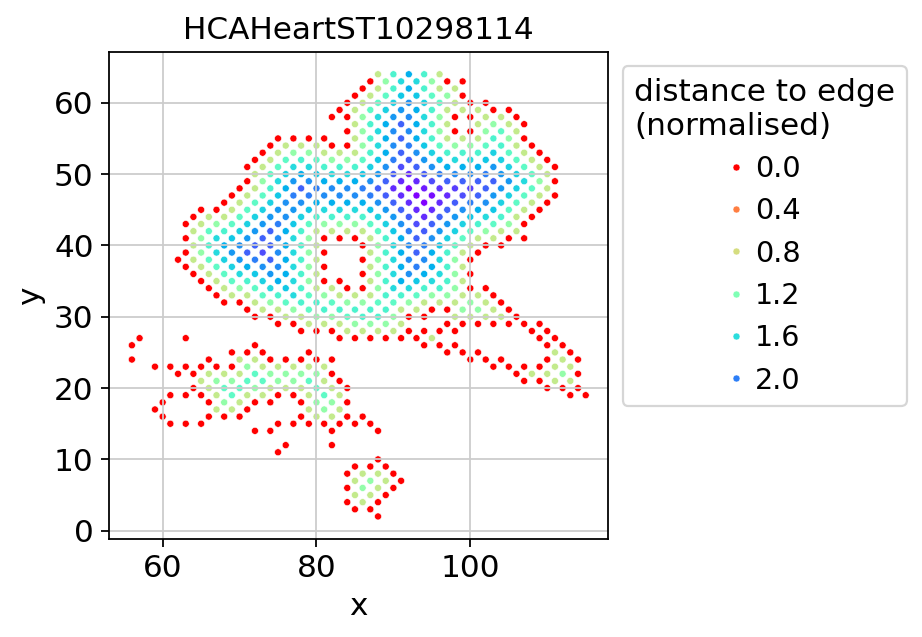

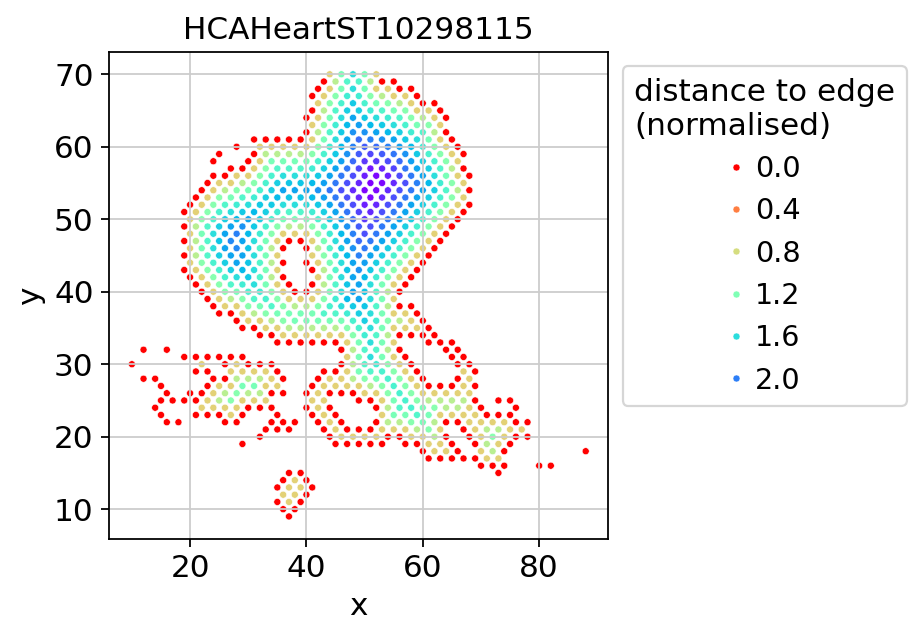

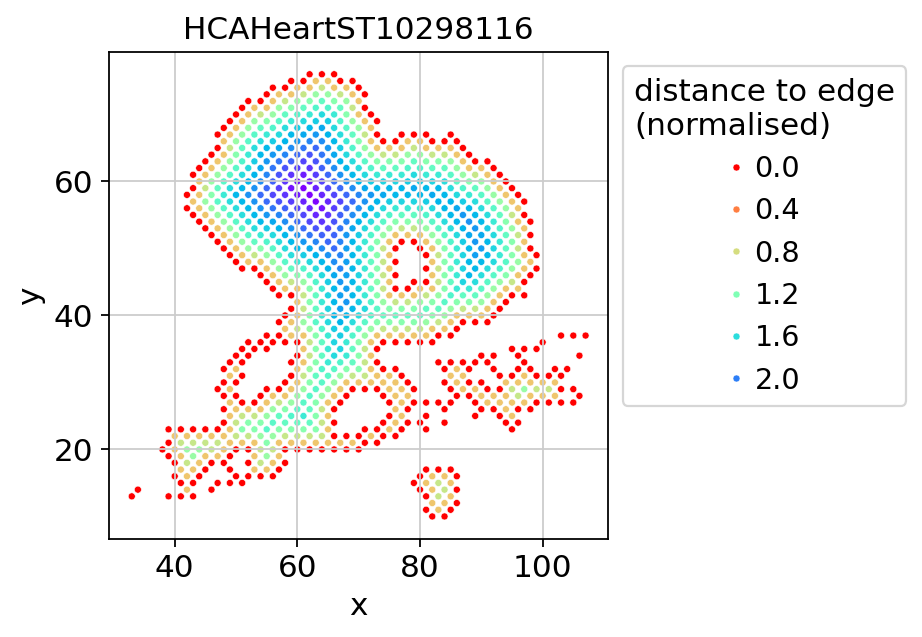

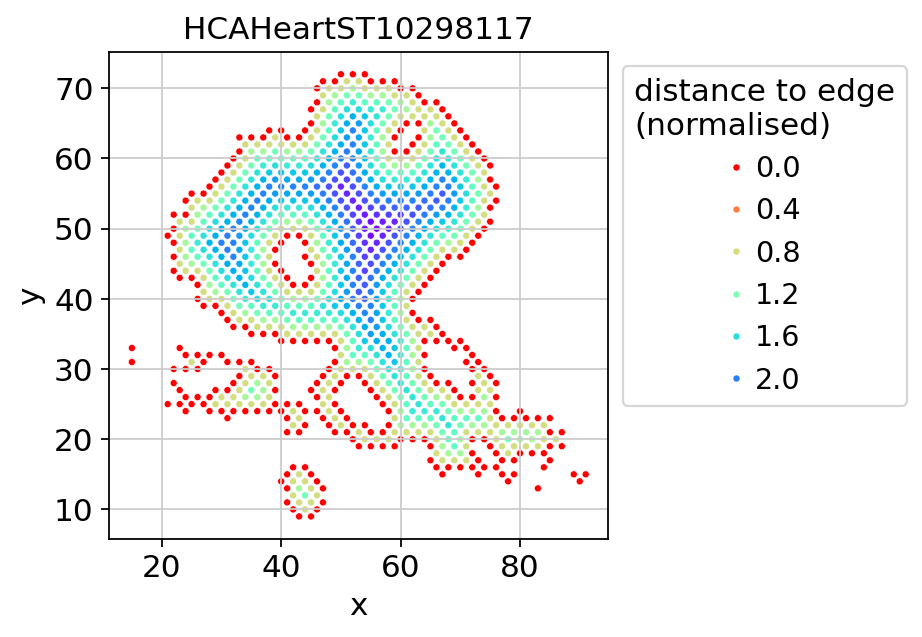

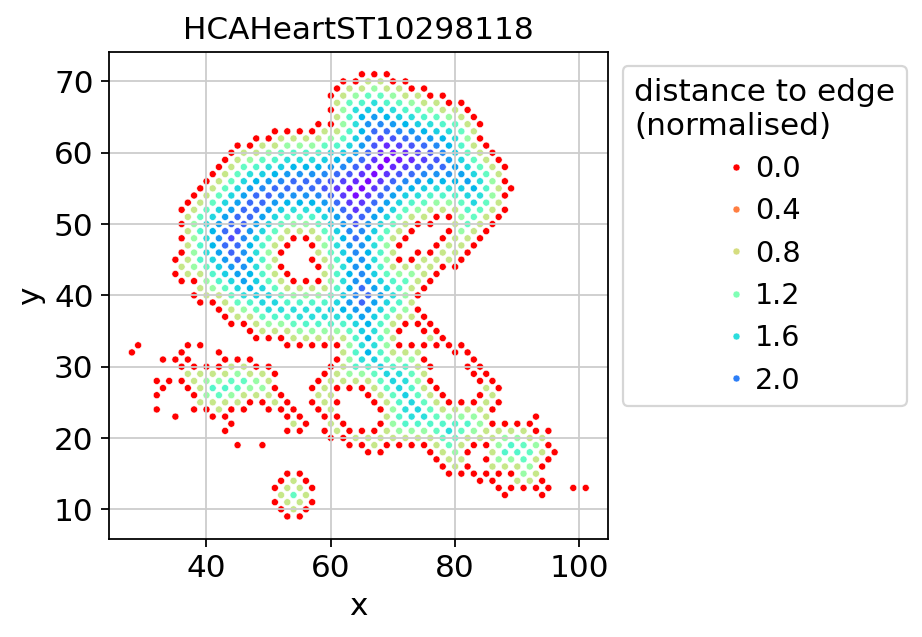

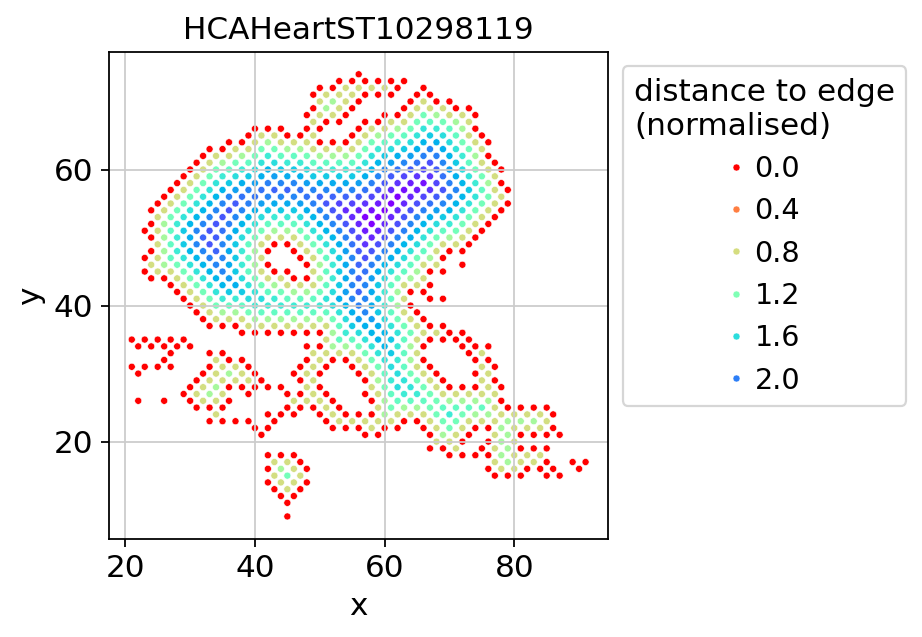

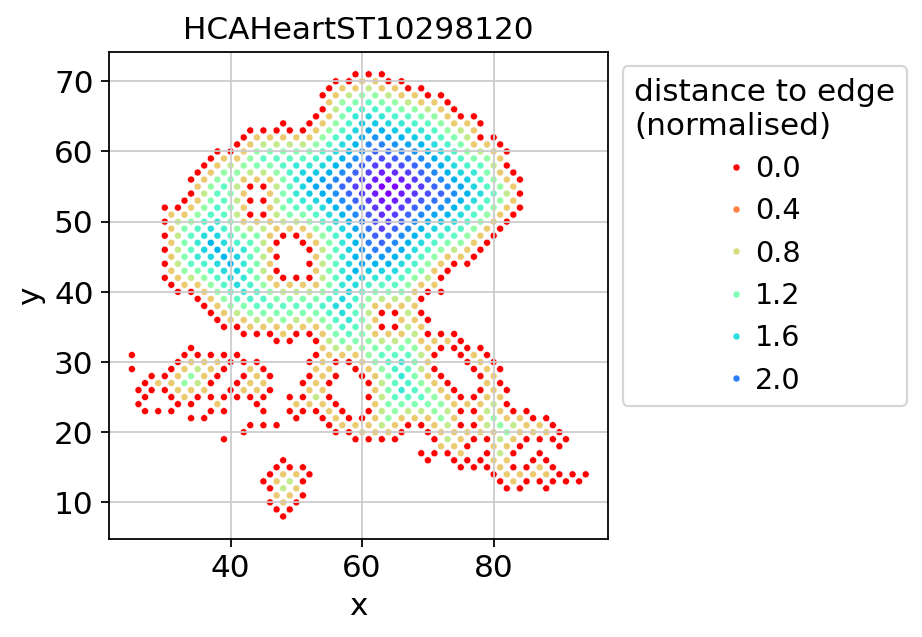

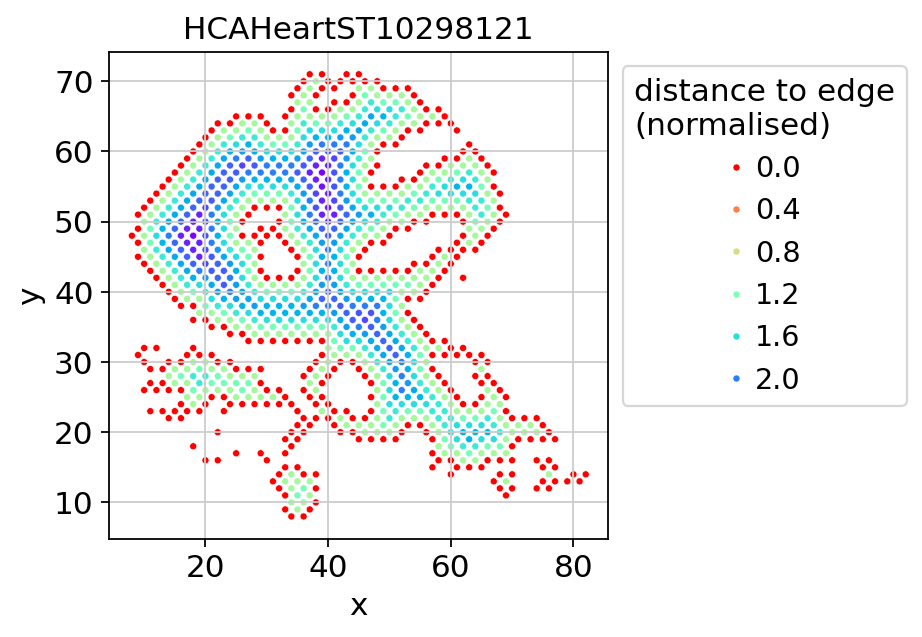

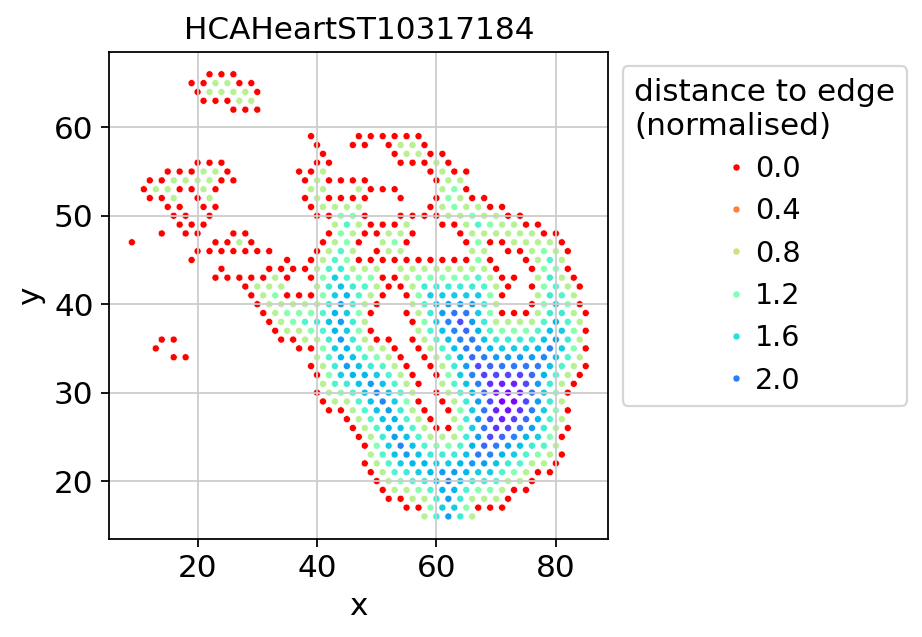

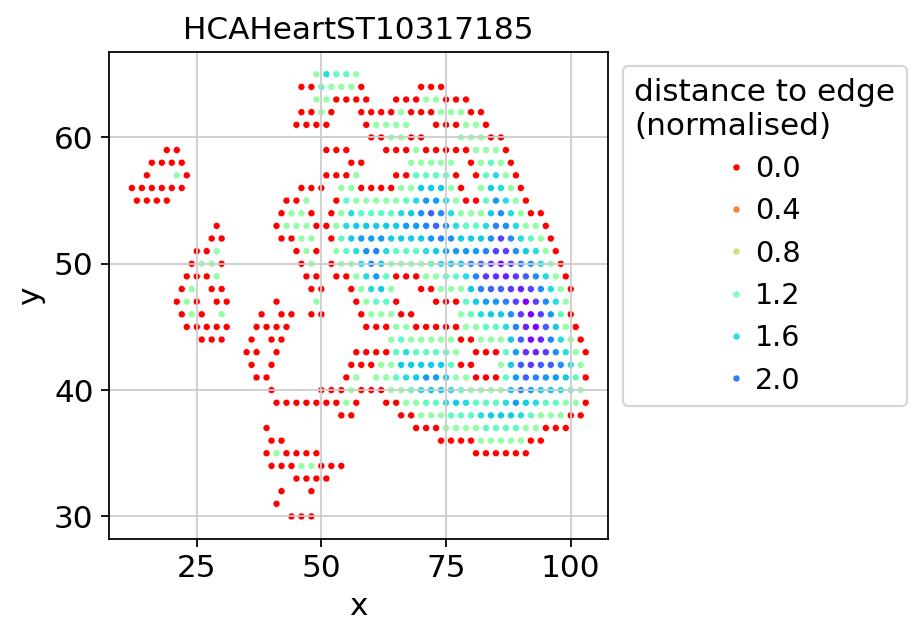

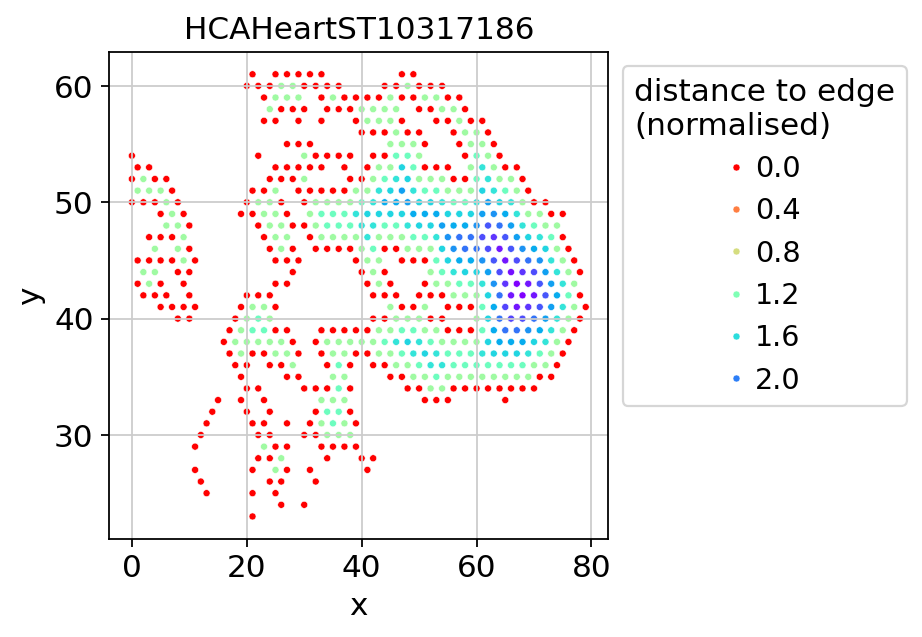

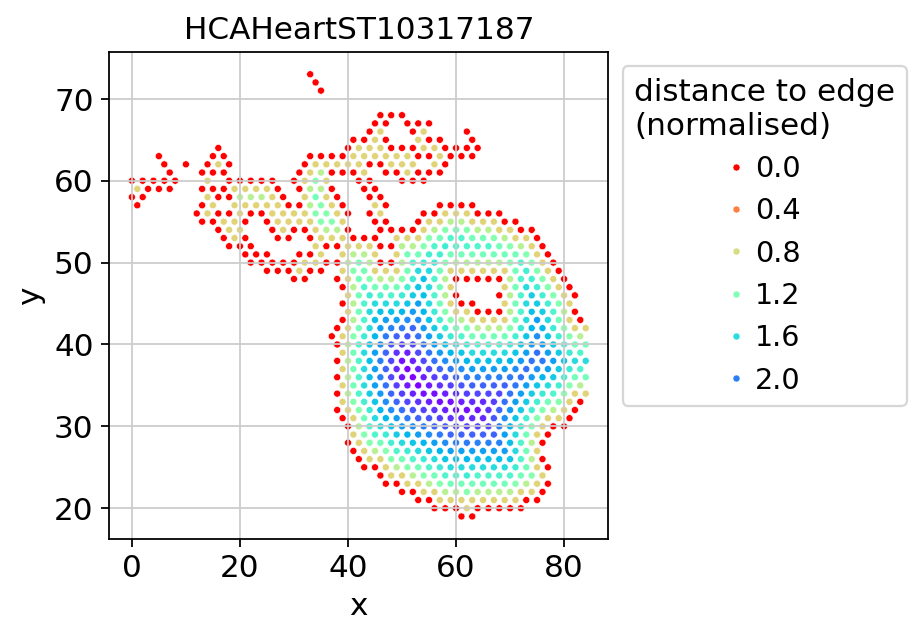

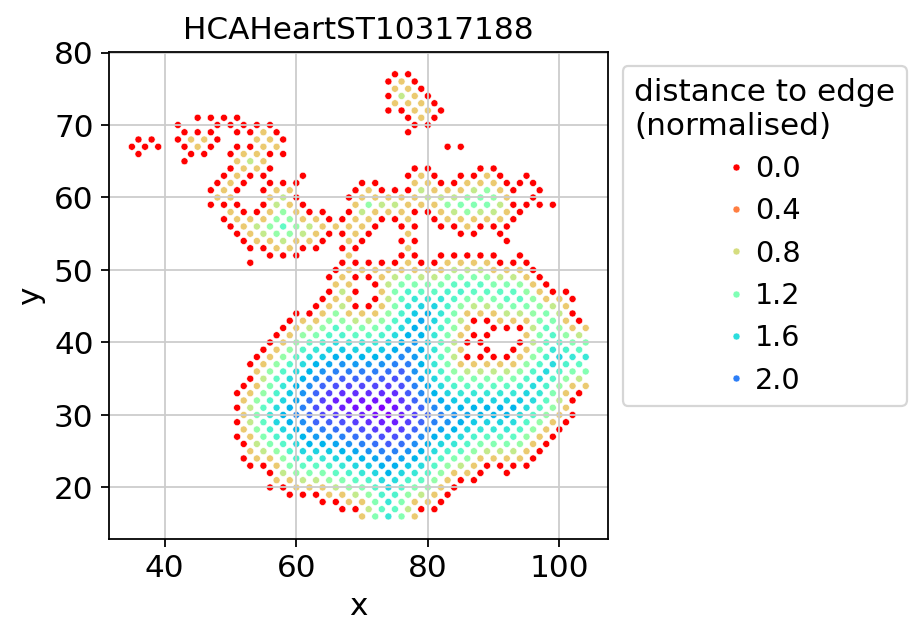

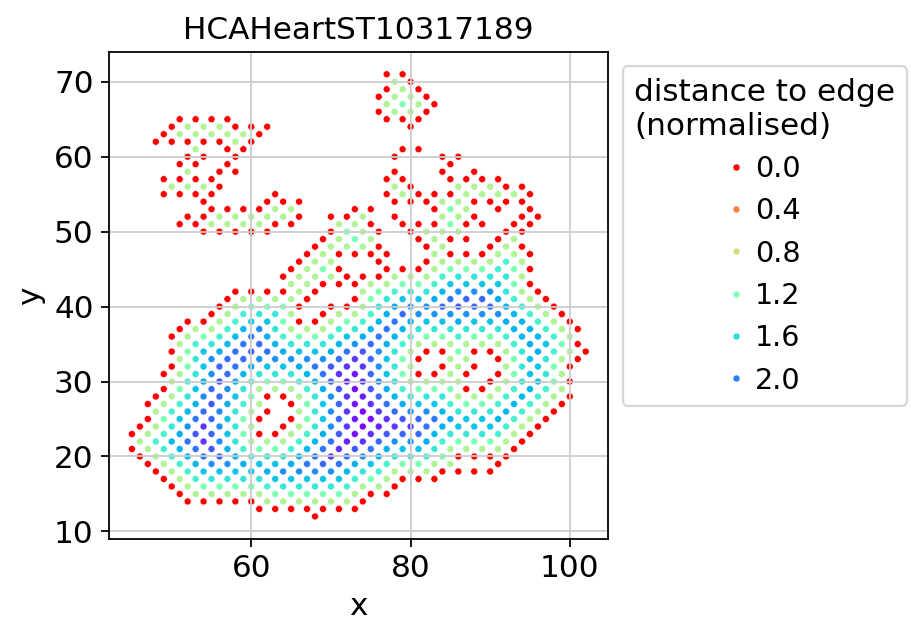

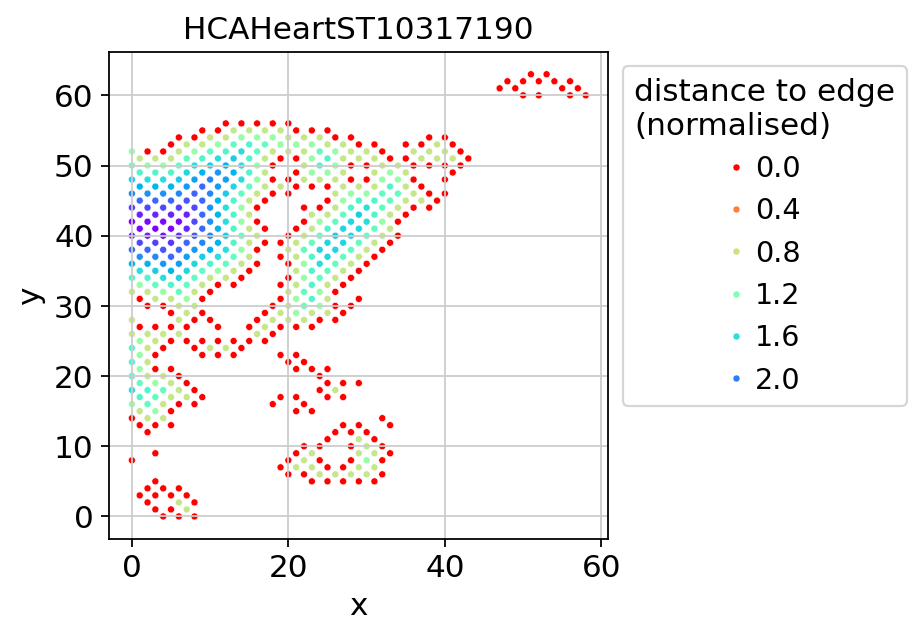

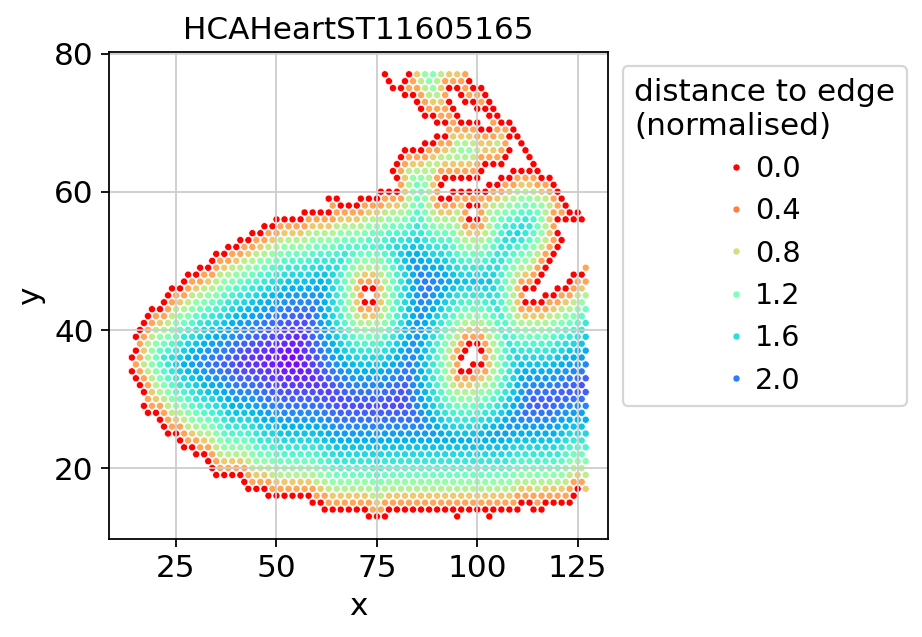

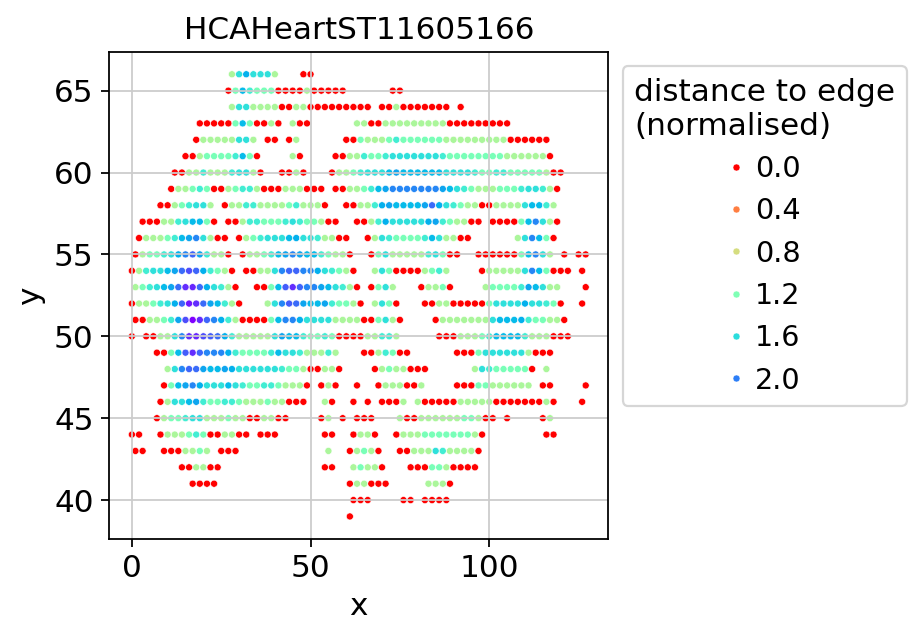

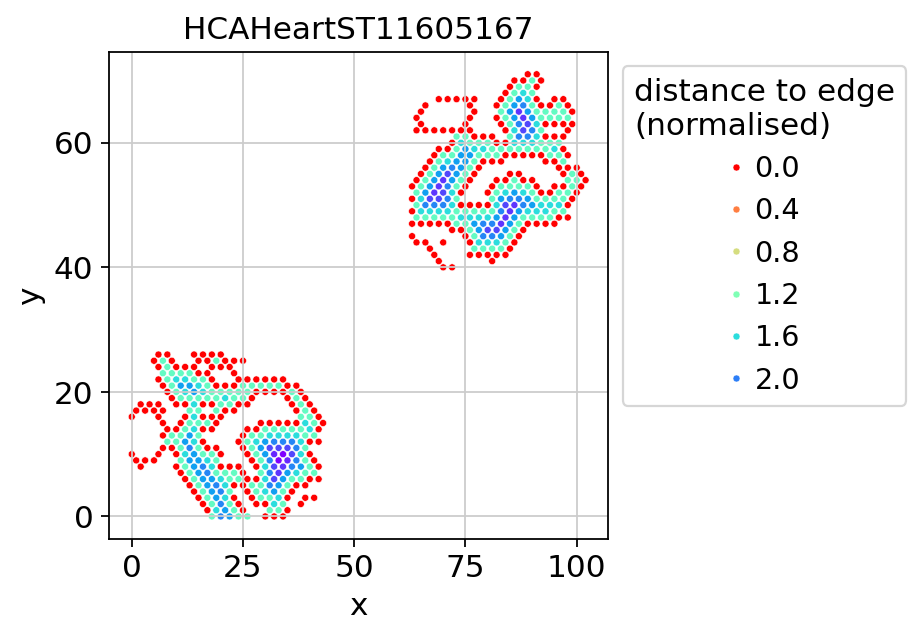

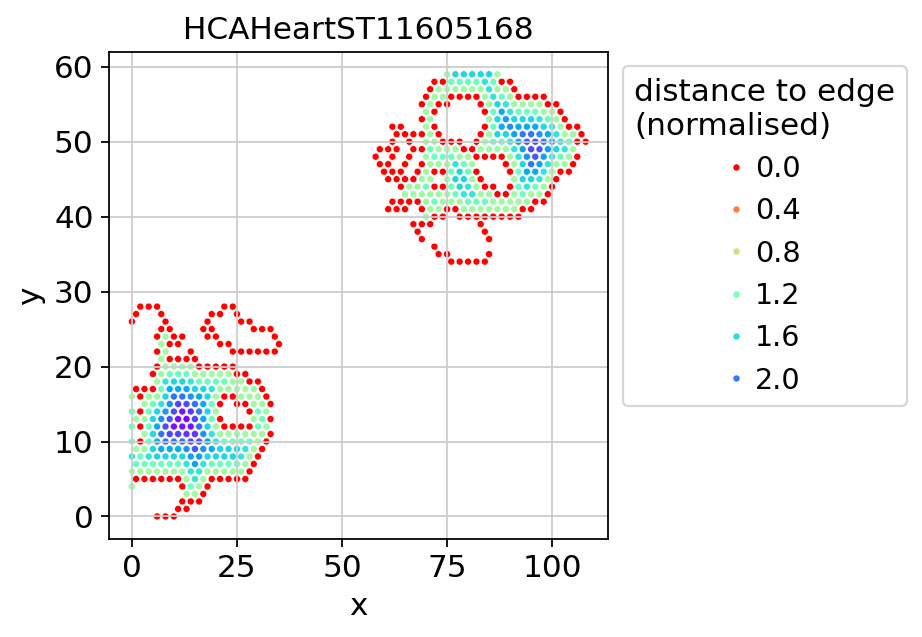

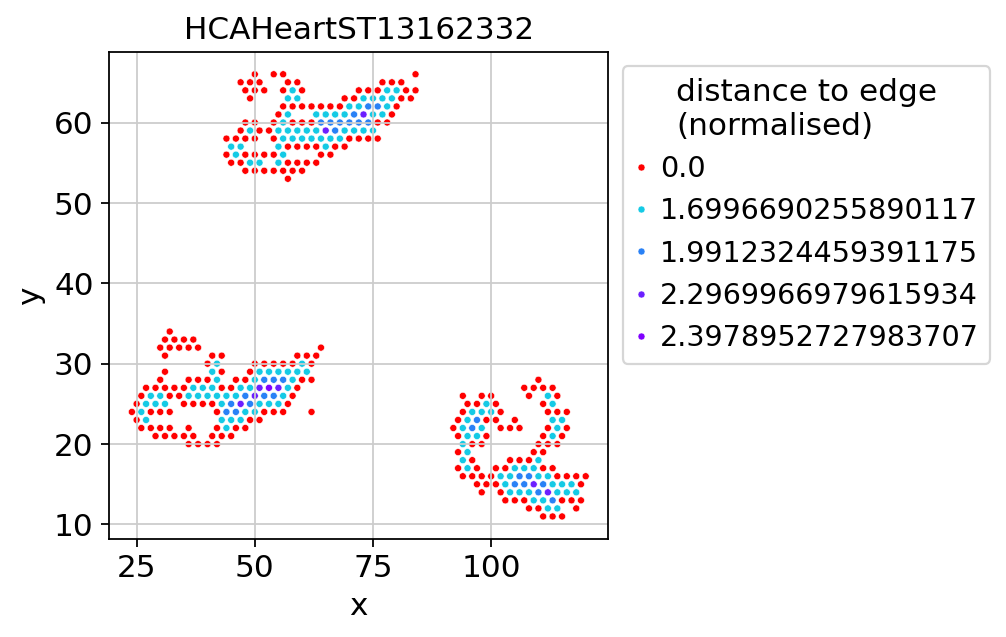

(19179, 5213)
CPU times: user 6.59 s, sys: 1.11 s, total: 7.7 s
Wall time: 10.1 s


ADD3_own  MTBP_own  MIR1-1HG_own  \
spot_id                                                                   
HCAHeartST10298114_AAACAAGTATCTCCCA-1  0.576221       0.0      0.576221   
HCAHeartST10298114_AAACATTTCCCGGATT-1  0.511360       0.0      0.000000   
HCAHeartST10298114_AAACGAGACGGTTGAT-1  0.434115       0.0      0.000000   
HCAHeartST10298114_AAACTCGTGATATAAG-1  0.833815       0.0      0.000000   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1  0.386992       0.0      0.000000   

                                       RAB15_own  GUCY1A1_own  KIRREL1_own  \
spot_id                                                                      
HCAHeartST10298114_AAACAAGTATCTCCCA-1   0.000000     0.000000     0.000000   
HCAHeartST10298114_AAACATTTCCCGGATT-1   0.000000     0.000000     0.000000   
HCAHeartST10298114_AAACGAGACGGTTGAT-1   0.434115     0.000000     0.000000   
HCAHeartST10298114_AAACTCGTGATATAAG-1   1.153775     1.282091     0.000000   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1   0.000000     0.000000     0.386992   

                                       FAM78A_own  ZC3H6_own  EDN1_own  \
spot_id                                                                  
HCAHeartST10298114_AAACAAGTATCTCCCA-1    1.205343   0.000000       0.0   
HCAHeartST10298114_AAACATTTCCCGGATT-1    1.099502   0.000000       0.0   
HCAHeartST10298114_AAACGAGACGGTTGAT-1    0.000000   0.000000       0.0   
HCAHeartST10298114_AAACTCGTGATATAAG-1    0.000000   0.000000       0.0   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1    0.386992   0.386992       0.0   

                                       ENSA_own  ...  NR2F2_neighbour-max  \
spot_id                                          ...                        
HCAHeartST10298114_AAACAAGTATCTCCCA-1  0.939462  ...             0.848366   
HCAHeartST10298114_AAACATTTCCCGGATT-1  0.848060  ...             0.488824   
HCAHeartST10298114_AAACGAGACGGTTGAT-1  0.000000  ...             0.580278   
HCAHeartST10298114_AAACTCGTGATATAAG-1  0.360487  ...             0.560980   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1  0.386992  ...             1.038130   

                                       TTC37_neighbour-max  \
spot_id                                                      
HCAHeartST10298114_AAACAAGTATCTCCCA-1             0.848366   
HCAHeartST10298114_AAACATTTCCCGGATT-1             0.485388   
HCAHeartST10298114_AAACGAGACGGTTGAT-1             0.695380   
HCAHeartST10298114_AAACTCGTGATATAAG-1             0.918758   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1             1.384796   

                                       ACTA1_neighbour-max  \
spot_id                                                      
HCAHeartST10298114_AAACAAGTATCTCCCA-1             0.605984   
HCAHeartST10298114_AAACATTTCCCGGATT-1             0.000000   
HCAHeartST10298114_AAACGAGACGGTTGAT-1             0.406954   
HCAHeartST10298114_AAACTCGTGATATAAG-1             0.000000   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1             0.000000   

                                                  section    x   y  \
spot_id                                                              
HCAHeartST10298114_AAACAAGTATCTCCCA-1  HCAHeartST10298114  102  50   
HCAHeartST10298114_AAACATTTCCCGGATT-1  HCAHeartST10298114   97  61   
HCAHeartST10298114_AAACGAGACGGTTGAT-1  HCAHeartST10298114   79  35   
HCAHeartST10298114_AAACTCGTGATATAAG-1  HCAHeartST10298114  113  23   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1  HCAHeartST10298114   67  45   

                                       n_neighbours  is_edge  \
spot_id                                                        
HCAHeartST10298114_AAACAAGTATCTCCCA-1           4.0    False   
HCAHeartST10298114_AAACATTTCCCGGATT-1           4.0    False   
HCAHeartST10298114_AAACGAGACGGTTGAT-1           4.0    False   
HCAHeartST10298114_AAACTCGTGATATAAG-1           4.0    False   
HCAHeartST10298114_AAACTGCTGGCTCCAA-1           3.0     True   

                                       distance_to_edge  \
spot_id                               

In [4]:
%%time
data = tt.preprocess_reference_data(gene_panel=None,plot=True)
print(data.shape)
data.head()

# Train

In [5]:
%%time
tt.train(data,
          tissue_col='tissue',
          save_dir='/nfs/team205/kk18/github/TissueTypist/tissuetypist/trained_models_full'
         )

Training...: weight to neighbour spots = 0.0, weight to edge = 0
Training...: weight to neighbour spots = 0.3, weight to edge = 5
Training...: weight to neighbour spots = 1.0, weight to edge = 5
CPU times: user 5min 21s, sys: 1.03 s, total: 5min 22s
Wall time: 6min 45s
